In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
# import pandas as pd
from mpl_toolkits import mplot3d

plt.rcParams["figure.figsize"] = [8, 8]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arccos,linspace,array,arange,meshgrid,abs

from scipy.integrate import quad,dblquad,tplquad

from random import shuffle, sample, choice

$\renewcommand{\vec}{\mathbf}$

#### Quick exercise

What is the vector field of unit vectors pointing at the origin?

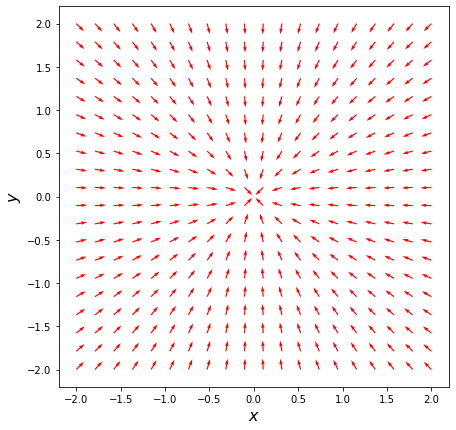

In [3]:
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
plt.figure(figsize=(7,7))
plt.quiver(x,y,-x/sqrt(x**2 + y**2),-y/sqrt(x**2 + y**2),color='r');
for c in 'xy':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
    getattr(plt.gca(),f"set_{c}label")(f"${c}$",size=16)

$$\vec F(x,y) = \left\langle -\frac{x}{\sqrt{x^2+y^2}}, - \frac{y}{\sqrt{x^2 + y^2}} \right\rangle $$

<!-- $$\vec F(x,y,z) = \frac{1}{\sqrt{x^2 + y^2 + z^2}} x \,\vec i + y \,\vec j + z \,\vec k/$$ -->

The gravitational field $\vec g$ of a particle at the origin with mass $M$ points at the origin with magnitude $\frac{GM}{r^2}$. Confusingly, physicists sometimes use $r$ for what we call $\rho$, distance to the origin in $\mathbb{R}^3$.

Write the formula for $\vec g(x,y,x)$.

$$\vec g(x,y,z) = \frac{GM}{(x^2 + y^2 + z^2)^{3/2}} (x\,\vec i + y\,\vec j + z\,\vec k)$$

## Example

Match the vector plot with the correct expression.

$$ \vec G(x,y) = \ln(1+y^2)\vec i + \ln(1+x^2)\,\vec j \qquad \vec H(x,y) = \vec i + \sin x\,\vec j$$ 
$$ \vec J(x,y) =  \vec i + \sin y\,\vec j \qquad \vec K(x,y) = y\,\vec i + \frac1x\,\vec j$$ 

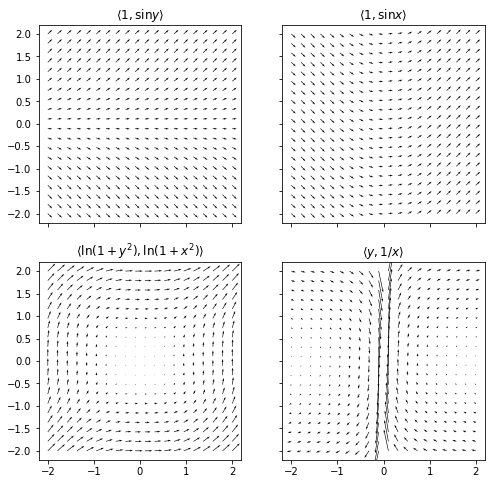

In [4]:
from random import shuffle
fig,axs = plt.subplots(2,2,sharex=True,sharey=True)
funcs = [(lambda x,y: np.array((log(1+y**2),log(1+x**2))),"\\langle \\ln (1+y^2) , \\ln(1+x^2) \\rangle"),
         (lambda x,y: np.array((1 + 0*x,sin(y))),"\\langle 1, \\sin y \\rangle"),
         (lambda x,y: np.array((1 + 0*x,sin(x))),"\\langle 1, \\sin x \\rangle"),
         (lambda x,y: np.array((y,1/x)),"\\langle y, 1/x \\rangle")]

shuffle(funcs)
x = y = np.linspace(-2,2,20)
x,y = np.meshgrid(x,y)
for f,ax in zip(funcs,[item for sublist in axs for item in sublist]):
    u,v = f[0](x,y)
    ax.quiver(x,y,u,v)
    ax.set_title(f"${f[1]}$")

### Exercise

Test yourself by re-running the following cell. The components of the vector field are chosen from the 10 functions 

$$\pm 1,\pm x,\pm y, \pm x^2, \pm y^2 $$

Determine its formula.

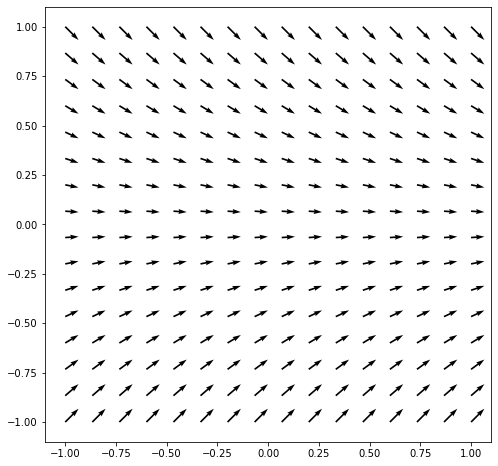

In [5]:
f,g = sample([lambda x,y: 1 + 0*x, lambda x,y: x**2, lambda x,y: x, lambda x,y: y, lambda x,y: y**2],2)
x = y = linspace(-1,1,16)
x,y = meshgrid(x,y)
plt.quiver(x,y,choice([-1,1])*f(x,y),choice([-1,1])*g(x,y));

### Example

For each vector field below, determine if it is conservative, and if so, find a potential function.

  

1. 
  
  $$\langle y, x \rangle$$
  

Yes. $f(x,y) = xy$.

  2. 
  
  $$\langle y^2, x \rangle$$
  

No.

  3. 
  
  $$\left\langle \frac{1 - 2 x y + x^2}{\left(x^{2} + 1\right)^{2}},\frac{1}{x^{2} + 1} \right\rangle$$
  

Yes. $f(x,y) = \frac{y}{1+x^2} + \tan^{-1}x$.

  4. 
  
  $$\left\langle z, x, y \right\rangle $$

No.

  5. 
  
  $$\left\langle z, y, x \right\rangle $$

Yes. $f(x,y,z) = \frac{y^2}{2} + xz$.

  6. 
  
  $$\left\langle \frac{y^{2}}{z},
\frac{2 x y}{z} + \frac{z}{y^{2}},
- \frac{x y^{2}}{z^{2}} + 3 z^{2} - \frac{1}{y} \right\rangle $$

Yes. $f(x,y,z) = \frac{xy^2}{z} -\frac{z}{y} + z^3$.

#### Quick Exercise

Is gravity conservative?

Yes. $f(x,y,z) = \frac{GM}{\sqrt{x^2 + y^2 + z^2}}$.